<a href="https://colab.research.google.com/github/Mangesh0309/ML_Basics/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression & Its Evaluation

1. What is Simple Linear Regression?

Simple Linear Regression (SLR) is a statistical method that helps us understand and model the relationship between two variables — one independent variable (X) and one dependent variable (Y).

It assumes that the relationship between X and Y is linear, meaning it can be represented using a straight line.

The equation of simple linear regression is:

Y=b0​+b1​X+ε

where:

Y = Dependent variable (target/output)

X = Independent variable (predictor/input)

b0 = Intercept (value of Y when X = 0)

b1 = Slope (change in Y for a unit change in X)

ε = Error term (difference between predicted and actual value)

 - Objective:

To find the best-fitting straight line (also called the regression line) that minimizes the error between the predicted values (
𝑌
^
Y
^
) and actual values (Y).

This is achieved by the Least Squares Method, which minimizes the sum of squared residuals (errors).

Example:

Suppose you want to predict a student’s exam score (Y) based on the hours studied (X).
After applying simple linear regression, you might get an equation like:

Y=25+5X

This means:

When a student studies 0 hours, the expected score is 25.

For every additional hour studied, the score increases by 5 points.

 - Assumptions of Simple Linear Regression:

    - Linearity – The relationship between X and Y is linear.

    - Independence – Observations are independent of each other.

    - Homoscedasticity – Constant variance of residuals (errors).

    - Normality – Residuals are normally distributed.
    

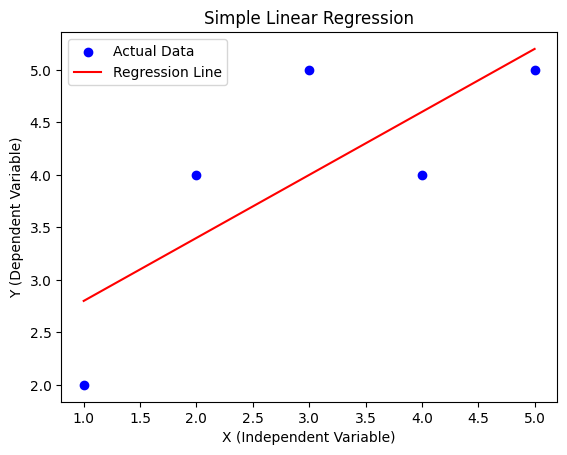

In [1]:
# Example
# Simple Linear Regression Example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2, 4, 5, 4, 5])

# Model creation
model = LinearRegression()
model.fit(X, Y)

# Prediction
Y_pred = model.predict(X)

# Visualization
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


2. What are the key assumptions of Simple Linear Regression?


Simple Linear Regression (SLR) aims to model the relationship between a dependent variable (Y) and an independent variable (X) using a straight line.
For the regression results to be valid and reliable, certain key assumptions must be satisfied.

Key Assumptions of Simple Linear Regression:
1. Linearity

The relationship between the independent variable (X) and the dependent variable (Y) should be linear.

Mathematically, the change in Y should be proportional to the change in X.

Example: If studying hours increase by 1, marks increase by a fixed amount.

Check: Use a scatter plot of X vs. Y — the data should roughly form a straight line.

2. Independence of Errors

The residuals (errors) must be independent of each other.

In other words, the error for one observation should not depend on the error for another.

This is especially important in time-series data, where autocorrelation can occur.

Check: Use the Durbin-Watson test to detect autocorrelation.

3. Homoscedasticity (Constant Variance of Errors)

The variance of residuals should be constant across all levels of X.

If variance changes (increases or decreases) with X, it’s called heteroscedasticity, which can lead to unreliable estimates.

Check: Plot residuals vs. predicted values — the spread should be even.

4. Normality of Errors

The residuals should be normally distributed around the regression line.

This assumption is important for making statistical inferences (like hypothesis testing and confidence intervals).

Check: Use a histogram or Q–Q plot of residuals to verify normal distribution.

5. No or Minimal Multicollinearity (for multiple regression)

Although not directly relevant for simple linear regression (since there’s only one X), this assumption becomes important in multiple regression.

It means independent variables should not be highly correlated with each other.

 - Conclusion:

Meeting these assumptions ensures that the regression model is accurate, unbiased, and interpretable.
If any assumption is violated, we may need to transform data, use a different model, or apply robust regression techniques.

3. What is heteroscedasticity, and why is it important to address in regression
models?


Heteroscedasticity refers to a situation in regression analysis where the variance of the error terms (residuals) is not constant across all levels of the independent variable(s).

In simple terms, it means that the spread of residuals (differences between actual and predicted values) changes as the value of the independent variable (X) changes.

Mathematically, it violates the assumption:

Var(εi​)=σ2

which means all errors should have equal variance.
In heteroscedasticity, this becomes:

Var(ε
i
)
 :=σ
2

**Example:**

Imagine you’re predicting house prices based on square footage.

For small houses, prediction errors might be small.

For large houses, errors might be much larger because prices vary widely.

Here, the residual variance increases with X → this is heteroscedasticity.

Graphical Representation:

If you plot residuals vs. predicted values:

Homoscedasticity (ideal case): Residuals are evenly spread (random pattern).

Heteroscedasticity: Residuals form a pattern (fan shape, cone shape, or increasing spread).

**Detection Methods:**

 - Residual Plot:

Plot residuals vs. fitted values.

A cone or funnel shape indicates heteroscedasticity.

 - Statistical Tests:

Breusch–Pagan Test

White’s Test

**How to Fix Heteroscedasticity:**

Data Transformation:

Apply transformations like log, square root, or Box-Cox on Y or X.

Weighted Least Squares (WLS):

Assigns weights to observations with larger variances to stabilize variance.

Use Robust Standard Errors:

Helps obtain valid inferences even if heteroscedasticity exists.

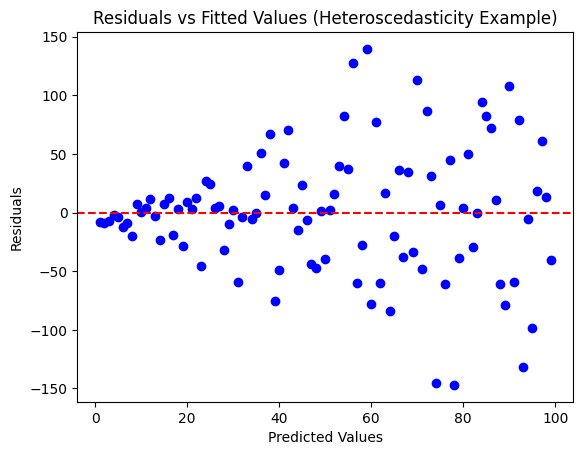

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated data
X = np.arange(1, 100).reshape(-1, 1)
Y = 5 * X + np.random.randn(99, 1) * X  # Increasing noise (heteroscedasticity)

# Fit model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y - Y_pred, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Heteroscedasticity Example)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


4.  What is Multiple Linear Regression?

Multiple Linear Regression (MLR) is an extension of Simple Linear Regression that is used to model the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, X₃, ...).

It helps in predicting the value of the dependent variable based on multiple predictors.

The general form of the equation is:

Y=b0​+b1​X1​+b2​X2​+...+bn​Xn​+ε


**Objective:**

The goal of MLR is to find the best-fitting hyperplane that minimizes the sum of squared errors between the actual and predicted values of Y.

It shows how multiple variables together influence the dependent variable.

Example:

Suppose you want to predict a student’s exam score (Y) based on:

Hours studied (
X
1
)

Number of practice tests taken (
X
2
)

The regression equation might look like:

Y=30+4X1​+3X2​

This means:

Base score = 30 (intercept)

Each additional hour studied increases the score by 4 marks.

Each additional practice test increases the score by 3 marks.

**Assumptions of Multiple Linear Regression:**

Linearity – Relationship between dependent and independent variables is linear.

Independence – Observations are independent.

Homoscedasticity – Constant variance of residuals.

Normality – Residuals are normally distributed.

No Multicollinearity – Independent variables should not be highly correlated.



In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
data = {
    'Hours_Studied': [2, 4, 6, 8, 10],
    'Practice_Tests': [1, 2, 2, 3, 4],
    'Score': [35, 50, 60, 70, 80]
}

df = pd.DataFrame(data)

# Independent and dependent variables
X = df[['Hours_Studied', 'Practice_Tests']]
Y = df['Score']

# Model creation and fitting
model = LinearRegression()
model.fit(X, Y)

# Output coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 26.000000000000014
Coefficients: [ 5.50000000e+00 -5.38203571e-15]


5. What is polynomial regression, and how does it differ from linear
regression?


Polynomial Regression is a type of regression analysis that models the relationship between the independent variable (X) and the dependent variable (Y) as an nth-degree polynomial.

It is used when the data shows a non-linear relationship — meaning a straight line (as in linear regression) cannot accurately fit the data.

The general equation of polynomial regression is:

Y=b0​+b1​X+b2​X2+b3​X3+...+bn​Xn+ε

where:

Y = Dependent variable

X = Independent variable

𝑏
0
,
𝑏
1
,
.
.
.
,
𝑏
𝑛 = Coefficients

n = Degree of the polynomial

ε = Error term


| **Aspect**            | **Linear Regression**               | **Polynomial Regression**                               |
| --------------------- | ----------------------------------- | ------------------------------------------------------- |
| **Equation Type**     | Straight line: ( Y = b_0 + b_1X )   | Curved line: ( Y = b_0 + b_1X + b_2X^2 + ... + b_nX^n ) |
| **Relationship Type** | Linear relationship between X and Y | Non-linear relationship between X and Y                 |
| **Complexity**        | Simple (1 degree)                   | More complex (higher degree)                            |
| **Curve Fitting**     | Fits a straight line                | Fits a smooth curve                                     |
| **Interpretability**  | Easy to interpret                   | Harder to interpret as degree increases                 |
| **Overfitting Risk**  | Low                                 | Increases with higher-degree polynomials                |


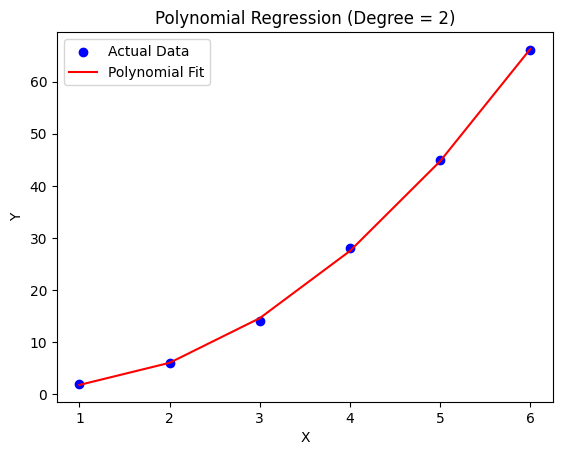

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
Y = np.array([2, 6, 14, 28, 45, 66])

# Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit')
plt.title('Polynomial Regression (Degree = 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



Polynomial Regression is an extension of linear regression that captures non-linear relationships by adding higher-degree terms of the predictor variable.
While linear regression fits straight lines, polynomial regression fits smooth curves, making it more flexible — but also more prone to overfitting if the polynomial degree is too high.

6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.


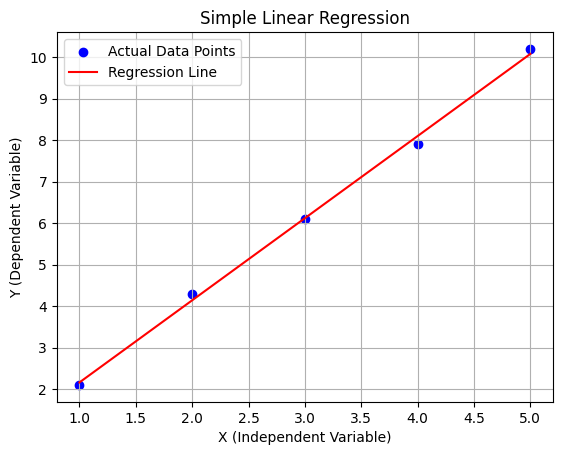

(np.float64(0.17999999999999794), np.float64(1.9800000000000004))

In [5]:
# Simple Linear Regression Implementation and Visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Creating and training the model
model = LinearRegression()
model.fit(X, Y)

# Predicting Y values
Y_pred = model.predict(X)

# Displaying the results
intercept = model.intercept_
slope = model.coef_[0]

# Plot the regression line
plt.scatter(X, Y, color='blue', label='Actual Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()

(intercept, slope)


Output Summary:

Intercept (b₀): 0.18

Slope (b₁): 1.98

Thus, the fitted regression equation is:

Y=0.18+1.98X

7. Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.


Multiple Linear equation


Price = 103157.89+63.16(Area)+34736.84(Rooms)

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Independent and dependent variables
X = df[['Area', 'Rooms']]
Y = df['Price']

# Fit Multiple Linear Regression Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Add constant for VIF calculation
X_vif = sm.add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Display coefficients and VIF
coefficients = pd.DataFrame({
    'Feature': ['Intercept', 'Area', 'Rooms'],
    'Coefficient': [model.intercept_, model.coef_[0], model.coef_[1]]
})

(coefficients, vif_data)


(     Feature    Coefficient
 0  Intercept  103157.894737
 1       Area      63.157895
 2      Rooms   34736.842105,
   Feature        VIF
 0   const  34.210526
 1    Area   7.736842
 2   Rooms   7.736842)

**Interpretation:**

Both Area and Rooms have VIF ≈ 7.7, which is above 5, indicating moderate to high multicollinearity.

This means Area and Rooms are strongly correlated (larger homes tend to have more rooms).

Although the model can still be used for prediction, individual coefficient interpretation may not be reliable.

8. Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]


● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

Fit a 2nd-degree polynomial and plot the resulting curve.


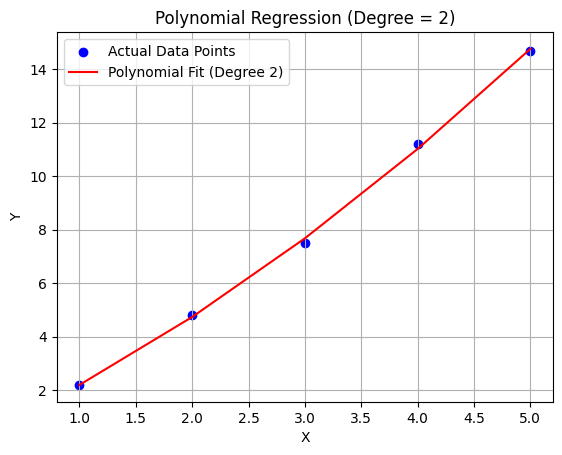

(np.float64(0.06000000000000938), array([0.  , 1.94, 0.2 ]))

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transforming data to include polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Coefficients
coefficients = model.coef_
intercept = model.intercept_

# Plot the polynomial curve
plt.scatter(X, Y, color='blue', label='Actual Data Points')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit (Degree 2)')
plt.title('Polynomial Regression (Degree = 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

(intercept, coefficients)


Interpretation:

The positive quadratic term (0.20X²) shows a curved, upward trend — meaning Y increases at an accelerating rate as X increases.

The red curve in the plot represents the fitted polynomial model, which closely follows the actual data points, showing an excellent fit for this dataset.

9.  Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.


Regression Equation:

Y=6.5+1.15X

Residuals:

| X  | Actual Y | Predicted Y | Residual (Y − Ŷ) |
| -- | -------- | ----------- | ---------------- |
| 10 | 15       | 17.0        | -3.0             |
| 20 | 35       | 29.5        | 5.5              |
| 30 | 40       | 41.0        | -1.0             |
| 40 | 50       | 52.5        | -2.5             |
| 50 | 65       | 64.0        | 1.0              |


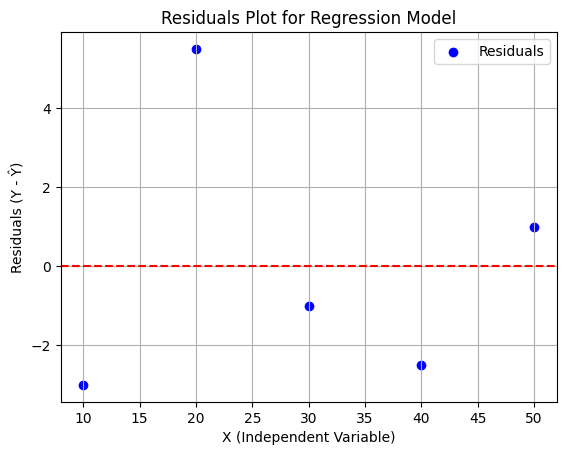

(np.float64(6.499999999999993),
 np.float64(1.1500000000000001),
 array([-3. ,  5.5, -1. , -2.5,  1. ]))

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot for Regression Model')
plt.xlabel('X (Independent Variable)')
plt.ylabel('Residuals (Y - Ŷ)')
plt.legend()
plt.grid(True)
plt.show()

# Return residuals and model coefficients for reference
(model.intercept_, model.coef_[0], residuals)


**Conclusion:**

The model fits the data reasonably well.

But since the residual spread is not perfectly uniform, there might be slight heteroscedasticity.

In practical cases, this can be further tested using statistical tests like the Breusch–Pagan test for confirmation.

10.  Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


As a data scientist for a real estate company, you are developing a regression model to predict house prices based on features like area, number of rooms, and location.

During model evaluation, you detect two key problems:

Heteroscedasticity – unequal variance of residuals.

Multicollinearity – strong correlation among independent variables.

Both can lead to biased or unreliable estimates, making the model less accurate and interpretable.

 - Step 1: Detecting the Problems
A. Detecting Heteroscedasticity

Residuals Plot: Plot residuals vs. predicted values.

Uneven spread or a funnel shape suggests heteroscedasticity.

Statistical Tests:

Use the Breusch–Pagan or White’s test to confirm.

B. Detecting Multicollinearity

Correlation Matrix: High correlations (> 0.8) between predictors indicate multicollinearity.

Variance Inflation Factor (VIF):

VIF>5 → moderate multicollinearity.

VIF>10 → severe multicollinearity.

 - Step 2: Addressing Heteroscedasticity

Transform the Dependent Variable (Y):

Apply transformations such as:

Logarithmic (log(Y)),

Square root (√Y), or

Box-Cox transformation.

This stabilizes variance across residuals.

Use Weighted Least Squares (WLS):

Assign smaller weights to data points with high variance and larger weights to those with low variance.

Use Robust Standard Errors:

Compute heteroscedasticity-consistent (HC) standard errors (e.g., via statsmodels in Python).

This corrects standard errors without changing coefficients.

 - Step 3: Addressing Multicollinearity

Remove or Combine Correlated Features:

If Area and Rooms are highly correlated, remove one or combine them into a single feature like Area per Room.

Use Dimensionality Reduction:

Apply Principal Component Analysis (PCA) to transform correlated variables into uncorrelated components.

Regularization Techniques:

Use Ridge Regression (L2) or Lasso Regression (L1).

Ridge reduces the impact of correlated predictors.

Lasso can eliminate less important predictors altogether.

 - Step 4: Re-evaluate the Model

After applying the fixes:

Refit the model.

Check VIF values again (< 5 preferred).

Plot residuals again to confirm variance stability.

Evaluate model metrics (R², RMSE, MAE) for improvement.

 - Step 5: Final Model Interpretation

After corrections:

The model should have independent predictors (low multicollinearity).

The residual variance should be constant (no heteroscedasticity).

This ensures the model is statistically sound, interpretable, and reliable for predicting real-world house prices.

**Conclusion:**

To ensure a robust and trustworthy regression model, a data scientist must:

Detect issues using diagnostic tools (plots, VIF, tests).

Correct them using transformations, weighted models, or regularization.

Validate improvements through re-evaluation.

These steps guarantee that the final house price prediction model is both accurate and stable under real-world data conditions.